In [1]:
import pyFAI
import numpy as np
%matplotlib nbagg 
import pyFAI.test.utilstest
import fabio
from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
from pyFAI.gui.jupyter.calib import Calibration
print(f"PyFAI version {pyFAI.version}")

PyFAI version 0.21.3


Setting the calibration parameters such as wavelenght, detector mask (for JF it is Eiger) and calibrant. To display the library of available calibrants uncomment the line with "...CALIBRANT_FACTORY.keys"

In [17]:
wavelength = 1e-10
print(eiger4m)
lab6a = pyFAI.calibrant.CALIBRANT_FACTORY("LaB6_SRM660a")
#lab6b = pyFAI.calibrant.CALIBRANT_FACTORY("LaB6_SRM660b")
#lab6c = pyFAI.calibrant.CALIBRANT_FACTORY("LaB6_SRM660c")
print(lab6a)
#print(lab6b)
#print(lab6c)
#print(pyFAI.calibrant.CALIBRANT_FACTORY.keys)
lab6a.wavelength = wavelength

Detector Eiger 4M	 PixelSize= 7.500e-05, 7.500e-05 m
LaB6_SRM660a Calibrant with 91 reflections 


Providing the actual H5 file. Will be converted to CBF and the EDF in order to use the calibration function. This is done in the next 3 tabs...

In [7]:
images = fabio.open("lab6-lab6_117_3_data_000001.h5")
print(images)
header = {}
for idx, frame in enumerate(images):
    cbf = fabio.cbfimage.cbfimage(header=header,data=frame.data)
    fname = "jf_lab6%04i.cbf"%idx
    cbf.write(fname)
    #print(fname)
    if idx==0:
        break
print(idx +1 ," frames are converted")

Eiger dataset with 1 frames from lab6-lab6_117_3_data_000001.h5
1  frames are converted


In [8]:
import glob
files = glob.glob("jf_lab*.cbf")
files.sort()
print("Number of files: %s" % len(files))

Number of files: 1


In [9]:
print("files that are generated")
for onefile in files:
    print(onefile)
    final_name = "jf_lab6" + onefile[9]+ onefile[10] + ".edf"
    print(final_name)
    fabio.open(onefile).convert("edf").save(final_name)

files that are generated
jf_lab60000.cbf
jf_lab600.edf


Providing the converted EDF file for dispay and calibration. 

In [11]:
img = fabio.open("jf_lab600.edf").data
#img = img.astype(np.float32)
#print(4294967300.0 in img)
#img_copy = np.copy(img) 
#img[img == 4294967300.0] = -1
#print(4294967300.0 in img)
#print(4294967300.0 in img_copy)

Next Tab displays the image. Make sure the mask areas are either 0 or -1. If not, calibration will not work. For Eiger data, maks areas need to be converted (commented comands above).

<IPython.core.display.Javascript object>


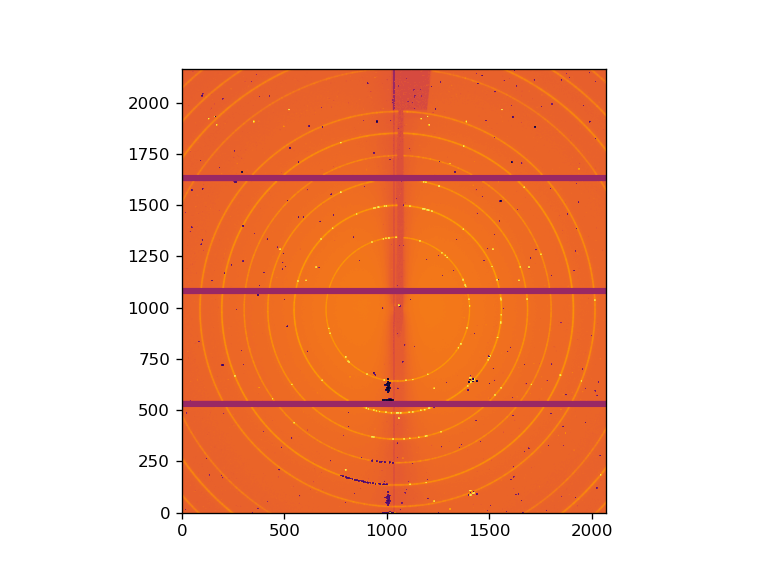

In [12]:
_ = jupyter.display(img)

Actual calibration function:
1.) Make sure the parameters are correct such as wavelength, calibrant and mask. 
2.) Try to enlarge the image , facilitates selection of calibration rings ( bottom right corner)
3.) Zoom in, such that you can see at least 4 rings, wedge of the ring is enough. (This can be done with the zoom button, cross with arrows). Drag with the right mouse over the area you want to be zoomed in, left mouse will move the whole image)
4.) Click the zoom cross again, in order to be backk into calibration mode. 
5.) Change the number in "Ring#" to 0 and select the first ring with the right mouse click. It is important to point with the tip of the mouse arrow onto the ring. When successfully selected , coloured parts appear on the ring. 
6.) Repeat step 5 for Ring 1 and 2 (at least)
7.) Press "refine"
6.) Rings should appear after some time on the images, and several iterations of calibration will be printed. 

In [15]:
calib = Calibration(img,calibrant=lab6a, wavelength=wavelength, detector=eiger4m)

Before refinement, the geometry is:
Detector Eiger 4M	 PixelSize= 7.500e-05, 7.500e-05 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.000000e-01m	PONI= 0.000000e+00, 0.000000e+00m	rot1=0.000000  rot2= 0.000000  rot3= 0.000000 rad
DirectBeamDist= 100.000mm	Center: x=0.000, y=0.000 pix	Tilt=0.000 deg  tiltPlanRotation= 0.000 deg
Detector Eiger 4M	 PixelSize= 7.500e-05, 7.500e-05 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.067792e-01m	PONI= 7.518369e-02, 7.856703e-02m	rot1=-0.003430  rot2= -0.005744  rot3= 0.000000 rad
DirectBeamDist= 106.782mm	Center: x=1052.444, y=994.270 pix	Tilt=0.383 deg  tiltPlanRotation= -59.161 deg
Detector Eiger 4M	 PixelSize= 7.500e-05, 7.500e-05 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.067794e-01m	PONI= 7.518374e-02, 7.856711e-02m	rot1=-0.003430  rot2= -0.005744  rot3= 0.000000 rad
DirectBeamDist= 106.782mm	Center: x=1052.445, y=994.271 pix	Tilt=0.383 deg  tiltPlanRotation= -59.161 deg
Detector Eiger 4M	 PixelSize= 7.500e-05, 7.500e-05 m
Wavelength= 1.000000

In [16]:
gr = calib.geoRef
print(gr)


Detector Eiger 4M	 PixelSize= 7.500e-05, 7.500e-05 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.067794e-01m	PONI= 7.518374e-02, 7.856711e-02m	rot1=-0.003430  rot2= -0.005744  rot3= 0.000000 rad
DirectBeamDist= 106.782mm	Center: x=1052.445, y=994.271 pix	Tilt=0.383 deg  tiltPlanRotation= -59.161 deg
